# Clustered Bar Charts
To depict the relationship between two categorical variables, we can extend the univariate bar chart seen in the previous lesson into a clustered bar chart. 

Like a standard bar chart, we still want to depict the count of data points in each group, but each group is now a combination of labels on two variables.

Bars are organized into clusters based on levels of the first variable, and then bars are ordered consistently across the second variable within each cluster.

This is easiest to see with an example, using seaborn's `countplot` function. To take the plot from univariate to bivariate, we add the second variable to be plotted under the `hue` argument:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb 
import matplotlib.pyplot as plt

## Plot a Bar chart between two qualitative variables

In [2]:
fuel_econ = pd.read_csv('fuel-econ.csv')

In [3]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

In [4]:
fuel_econ.tail()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
3924,39882,Toyota,Prius Prime,2018,Midsize Cars,Front-Wheel Drive,Automatic (variable gear ratios),Regular Gasoline,4,1.8,0,0,55.2206,78.8197,53.0000,73.6525,54.4329,78,10,10
3925,39898,Hyundai,Sonata Hybrid,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,0,106,39.0000,55.9000,44.3066,64.0000,41.0000,217,9,9
3926,39899,Hyundai,Sonata Hybrid SE,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,0,106,40.0000,56.0000,46.0000,64.0000,42.0000,212,9,9
3927,39900,Lexus,LS 500,2018,Midsize Cars,Rear-Wheel Drive,Automatic (S10),Premium Gasoline,6,3.4,99,0,19.2200,24.2000,30.2863,43.4000,23.0021,387,5,5
3928,39901,Lexus,LS 500 AWD,2018,Midsize Cars,All-Wheel Drive,Automatic (S10),Premium Gasoline,6,3.4,99,0,18.0431,22.6000,27.0000,39.3000,21.3945,417,4,4


In [5]:
# The existing `trans` column has multiple sub-types of Automatic and Manual. 
# But, we need plain two types, either Automatic or Manual. Therefore, add a new column. 

# The Series.apply() method invokes the `lambda` function on each value of `trans` column.
# In python, a `lambda` function is an anonymous function that can have only one expression.
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x:x.split()[0])
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


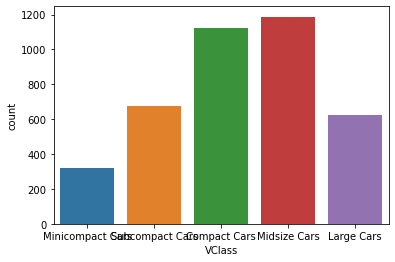

In [6]:
sb.countplot(data = fuel_econ, x = 'VClass');

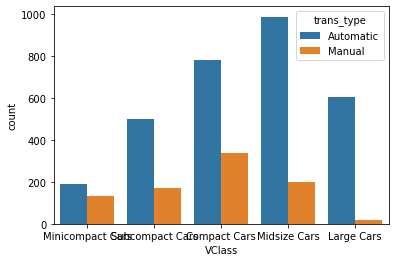

In [7]:
sb.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type');

##  Plot a Heat Map between two qualitative variables
One alternative way of depicting the relationship between two categorical variables is through a heat map. Heat maps were introduced earlier as the 2-D version of a histogram; here, we're using them as the 2-D version of a bar chart.

 The seaborn function `heatmap()` is at home with this type of heat map implementation, but the input arguments are unlike before, Instead of providing the original dataframe, we need to summarize the counts into a matrix that will then be plotted.

In [14]:
# Use group_by() and size() to get the number of cars
# and each combination of the two variable levels, as a pandas Series
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()
ct_counts

VClass            trans_type
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
Compact Cars      Automatic     784
                  Manual        338
Midsize Cars      Automatic     989
                  Manual        199
Large Cars        Automatic     605
                  Manual         20
dtype: int64

In [15]:
# Use Series.reset_index() to convert a series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')


In [16]:
ct_counts

,VClass,trans_type,count
0,Minicompact Cars,Automatic,188
1,Minicompact Cars,Manual,133
2,Subcompact Cars,Automatic,502
3,Subcompact Cars,Manual,171
4,Compact Cars,Automatic,784
5,Compact Cars,Manual,338
6,Midsize Cars,Automatic,989
7,Midsize Cars,Manual,199
8,Large Cars,Automatic,605
9,Large Cars,Manual,20


In [17]:
# Use DataFrame.pivot() to rearrange the data, to have vehicle class on rows
ct_counts = ct_counts.pivot(index = 'VClass', columns = 'trans_type', values = 'count')
ct_counts.head()

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


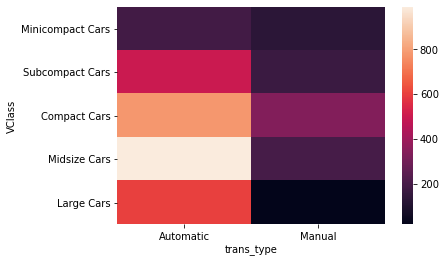

In [18]:
sb.heatmap(ct_counts);

The heat map tells the same story as the clustered bar chart.

## Additional Variation

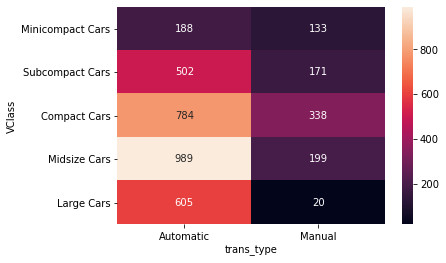

In [22]:
sb.heatmap(ct_counts, annot = True, fmt = 'd');

Since the default string formatting only goes to two digits of precision. Adding `fmt = 'd'` means that annotations will all be formatted as integers instead. We can use `fmt = '.0f'` if we have any cells with no counts, in order to account for NaNs.

### I will  investigate the difference between only the two main fuel types found in the `fuelType` variable: Regular Gasoline and Premium Gasoline.

In [25]:
fuel_econ['fuelType'].value_counts()

Premium Gasoline     2302
Regular Gasoline     1521
Diesel                 80
Midgrade Gasoline      23
Natural Gas             3
Name: fuelType, dtype: int64

In [23]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

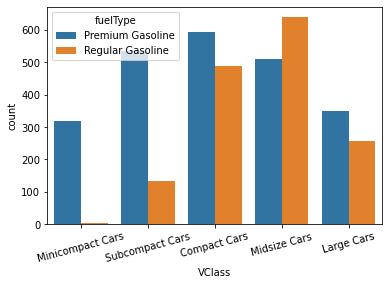

In [24]:
fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]
sb.countplot(data=fuel_econ_sub,x='VClass',hue='fuelType')
plt.xticks(rotation = 15);

# Faceting

One general visualization technique that will be useful for you to know about to handle plots of two or more variables is faceting. In faceting, the data is divided into disjoint subsets, most often by different levels of a categorical variable. For each of these subsets of the data, the same plot type is rendered on other variables. Faceting is a way of comparing distributions or relationships across levels of additional variables, especially when there are three or more variables of interest overall. 

For example, rather than depicting the relationship between one numeric variable and one categorical variable using a violin plot or box plot, we could use faceting to look at a histogram of the numeric variable for subsets of the data divided by categorical variable levels

Seaborn's `FacetGrid` class facilitates the creation of faceted plots. 

There are two steps involved in creating a faceted plot.

**First**, we need to create an instance of the `FacetGrid object` and specify the feature we want to facet by (vehicle class, `VClass` in our example). 

**Then** we use the `map method` on the FacetGrid object to specify the `plot type` and variable(s) that will be plotted in each subset (in this case, the `histogram` on combined fuel efficiency `comb`).

In [27]:
fuel_econ = pd.read_csv('fuel-econ.csv')
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

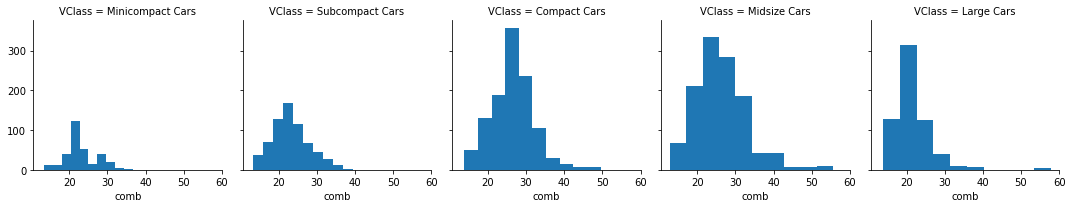

In [29]:
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = fuel_econ, col = 'VClass')
g.map(plt.hist, "comb");

It's  worth cleaning things a little bit more by setting the **same bin edges** on all facets. **Extra visualization parameters** can be set as additional keyword arguments to the `map function`.

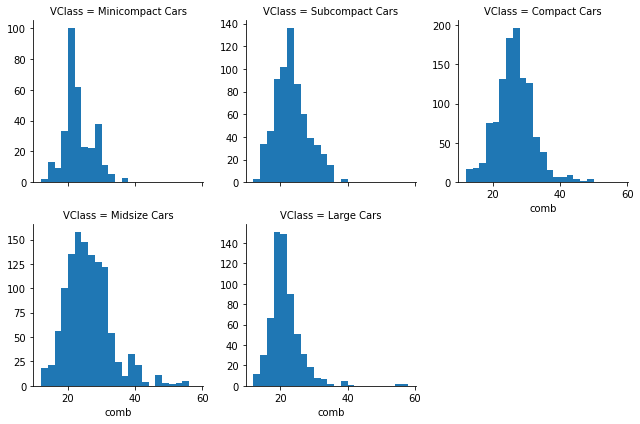

In [37]:
bin_edges = np.arange(12, 58+2, 2)

g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap=3,sharey=False)
g.map(plt.hist, 'comb', bins = bin_edges);

#### Note the y-axis is differ in each case!

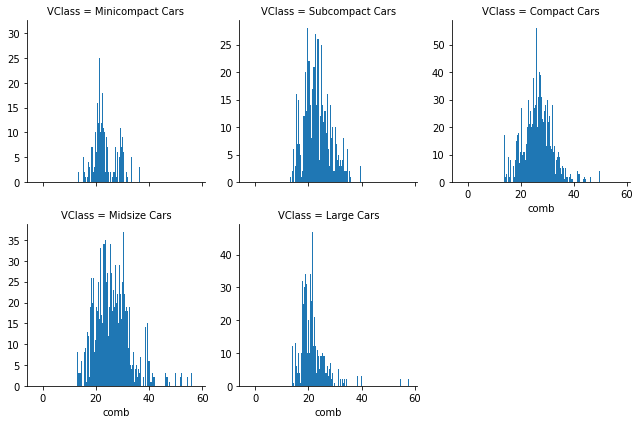

In [38]:
# Try experimenting with dynamic bin edges
bin_edges = np.arange(-3, fuel_econ['comb'].max()+1/3, 1/3)
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap=3,sharey=False)
g.map(plt.hist, 'comb', bins = bin_edges);

## Additional Variation

In [49]:
# Find the order in which you want to display the Facets
# For each transmission type, find the combined fuel efficiency
group_means = fuel_econ[['trans', 'comb']].groupby(['trans']).mean()

# Select only the list of transmission type in the decreasing order of combined fuel efficiency
group_order = group_means.sort_values(['comb'], ascending = False).index

In [50]:
group_means

,comb
trans,
Automatic (A1),34.677929
Automatic (AM-S6),27.770877
Automatic (AM-S7),21.572946
Automatic (AM-S8),24.119489
Automatic (AM6),33.194893
Automatic (AM7),23.690389
Automatic (AM8),28.364450
Automatic (AV-S10),27.918867
Automatic (AV-S6),31.246947


In [54]:
group_means.sort_values(['comb'], ascending = False)

,comb
trans,
Automatic (variable gear ratios),37.523607
Automatic (A1),34.677929
Automatic (AM6),33.194893
Automatic (AV-S6),31.246947
Automatic (AV-S7),30.242895
Manual 5-spd,29.584096
Automatic 4-spd,29.283284
Automatic (AM8),28.364450
Automatic (AV-S10),27.918867


#### Use the argument `col_order` to display the FacetGrid in the desirable group_order

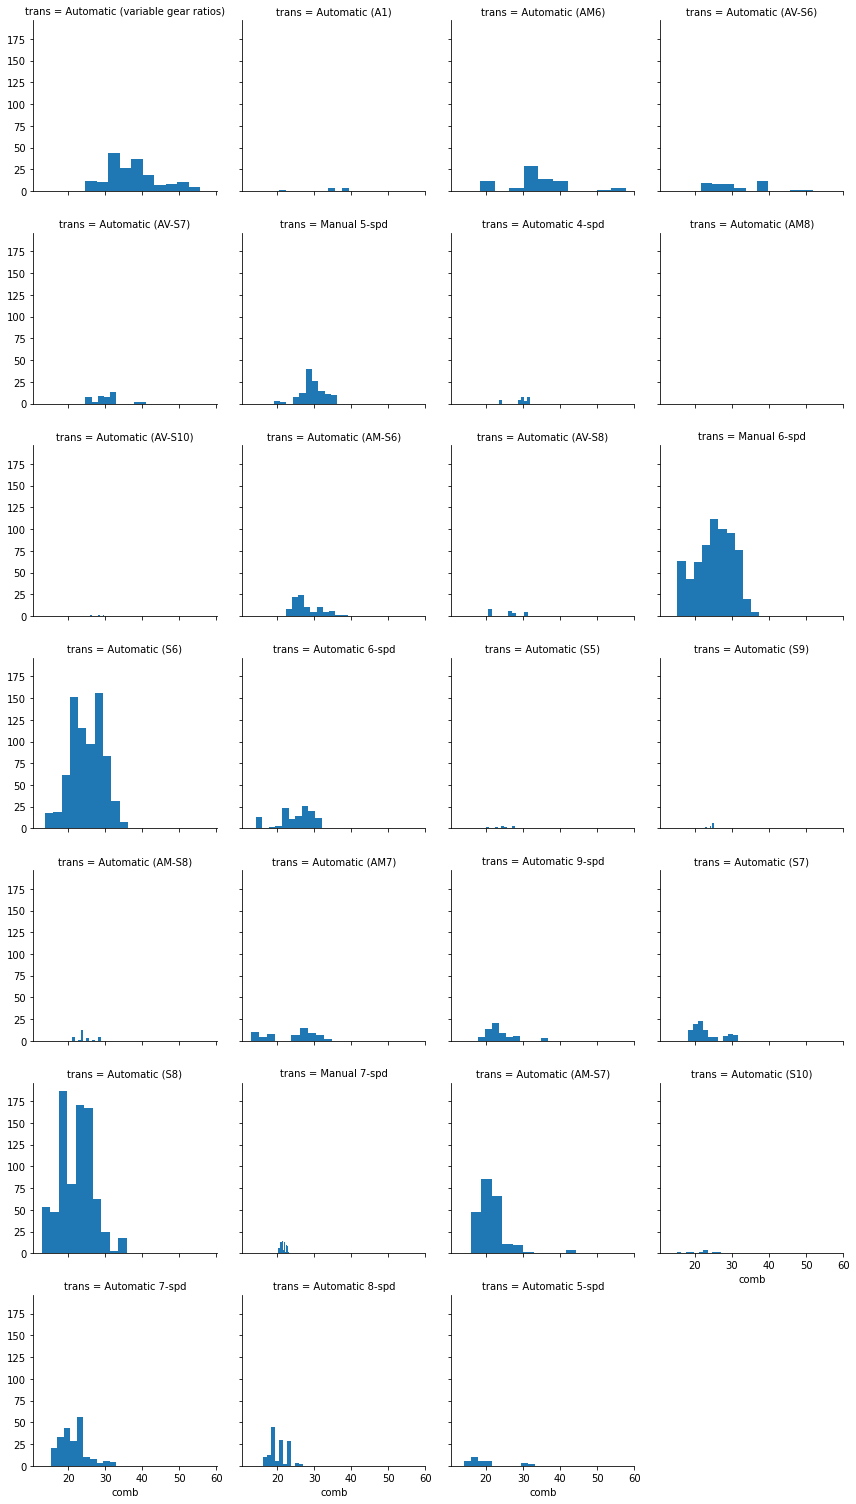

In [51]:
g = sb.FacetGrid(data = fuel_econ, col = 'trans', col_wrap = 4, col_order = group_order)
g.map(plt.hist, 'comb');

# Adaptation of Univariate Plots

## Adapted Bar Charts
Histogram and barchart plots can be adapted for use as bivariate plots by, instead of indicating count by height, indicating a mean or other statistic on a second variable. This is the purpose of seaborn's `barplot` function:

Text(0, 0.5, 'Avg. Combined Fuel Efficiency (mpg)')

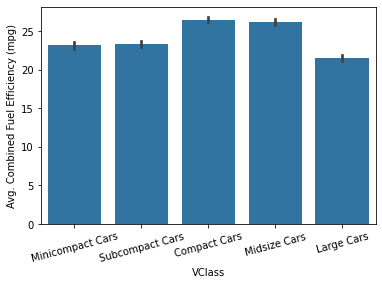

In [55]:
base_color = sb.color_palette()[0]
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')

The bar heights indicate the mean value on the numeric variable, with error bars plotted to show the uncertainty in the mean based on variance and sample size.

#### Try some parameters

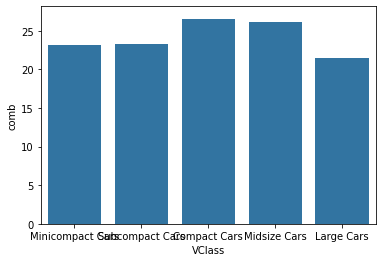

In [58]:
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, errwidth=0);

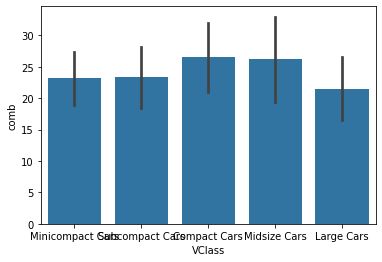

In [59]:
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd');

As an alternative, the `pointplot()` function can be used to plot the averages as points rather than bars. This can be useful if having bars in reference to a 0 baseline aren't important or would be confusing.

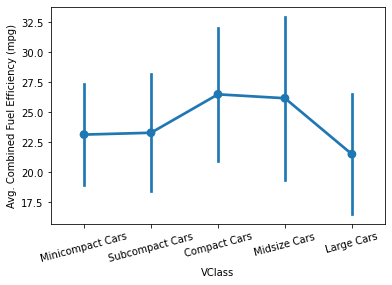

In [69]:
sb.pointplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd')#standard-dev
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

By default, `pointplot` will connect values by a line. This is fine if the categorical variable is ordinal in nature, but it can be a good idea to remove the line via `linestyles = ""` for nominal data.

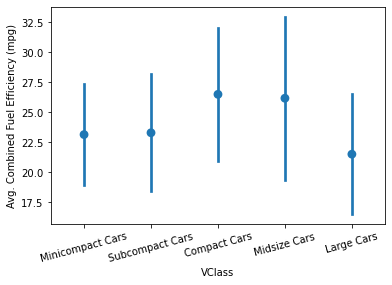

In [66]:
sb.pointplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd', linestyles="")
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

## Bringing a few charts together
The above plots can be useful alternatives to the `box plot` and `violin plot` if the data is not conducive to either of those plot types. For example, if the numeric variable is binary in nature, taking values only of 0 or 1, then a `box plot` or `violin plot` will not be informative, leaving the `adapted bar chart` as the best choice for displaying the data.

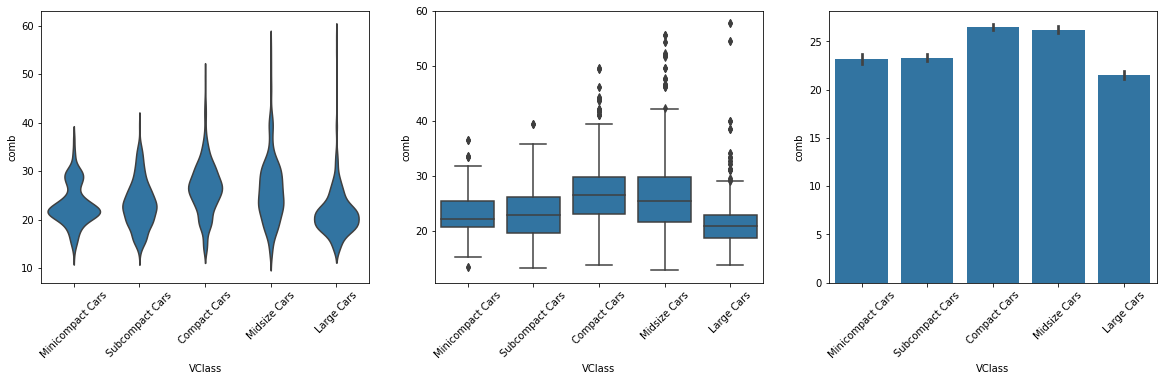

In [68]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
sb.violinplot(data=fuel_econ, x='VClass', y='comb', inner = None,
              color = base_color)
plt.xticks(rotation = 45); 

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=fuel_econ, x='VClass', y='comb', color = base_color)
plt.xticks(rotation = 45);

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.barplot(data=fuel_econ, x='VClass', y='comb', color = base_color)
plt.xticks(rotation = 45);

#### Matplotlib's `hist()` function can also be adapted so that bar heights indicate value other than a count of points through the use of the `weights` argument

# Line Plots
The line plot is a fairly common plot type that is used to plot the trend of one numeric variable against values of a second variable. In contrast to a scatterplot, where all data points are plotted, in a line plot, only one point is plotted for every unique x-value or bin of x-values (like a histogram). If there are multiple observations in an x-bin, then the y-value of the point plotted in the line plot will be a summary statistic (like mean or median) of the data in the bin. The plotted points are connected with a line that emphasizes the sequential or connected nature of the x-values.

If the x-variable represents time, then a line plot of the data is frequently known as a time series plot. For example, we have only one observation per time period, like in stock or currency charts.

We will make use of Matplotlib's `errorbar()` function, performing some processing on the data in order to get it into its necessary form.

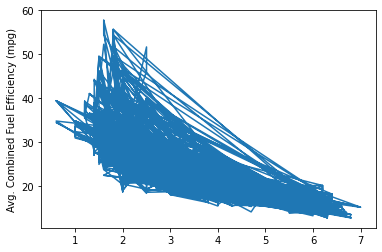

In [71]:
plt.errorbar(data=fuel_econ, x='displ', y='comb')
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

If we just blindly stick a dataframe into the function without considering its structure, we might end up with a mess like the above. The function just plots all the data points as a line, connecting values from the first row of the dataframe to the last row. In order to create the line plot as intended, we need to do additional work to summarize the data.

In [74]:
 # Set bin edges, and compute center of each bin 
bin_edges = np.arange(0.6, 7+0.2, 0.2)
bin_centers = bin_edges[:-1] + 0.1

Since the x-variable `displ` is continuous, we first set a number of bins into which the data will be grouped. 

In addition to the usual edges, the center of each bin is also computed for later plotting. For the points in each bin, we compute the `mean` and `standard error` of the mean.

In [75]:
bin_edges

array([0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ,
       3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. , 5.2, 5.4, 5.6,
       5.8, 6. , 6.2, 6.4, 6.6, 6.8, 7. ])

In [76]:
bin_centers

array([0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9, 3.1,
       3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.5, 4.7, 4.9, 5.1, 5.3, 5.5, 5.7,
       5.9, 6.1, 6.3, 6.5, 6.7, 6.9])

In [80]:
# Cut the bin values into discrete intervals. Returns a Series object.
displ_binned = pd.cut(fuel_econ['displ'], bin_edges, include_lowest = True)
displ_binned

0       (3.6, 3.8]
1       (1.8, 2.0]
2       (3.4, 3.6]
3       (3.4, 3.6]
4       (2.2, 2.4]
           ...    
3924    (1.6, 1.8]
3925    (1.8, 2.0]
3926    (1.8, 2.0]
3927    (3.2, 3.4]
3928    (3.2, 3.4]
Name: displ, Length: 3929, dtype: category
Categories (32, interval[float64]): [(0.6, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] ... (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]

A series object returned when the `fuel_econ['displ']` column passed to the `pandas.cut()` function

In [84]:
# For the points in each bin, we compute the mean and standard error of the mean.
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

In [92]:
comb_mean

displ
(0.6, 0.8]          NaN
(0.8, 1.0]    33.469158
(1.0, 1.2]    35.838600
(1.2, 1.4]    31.964468
(1.4, 1.6]    30.489490
(1.6, 1.8]    31.996801
(1.8, 2.0]    27.534614
(2.0, 2.2]    31.790900
(2.2, 2.4]    26.888429
(2.4, 2.6]    28.589656
(2.6, 2.8]    20.227183
(2.8, 3.0]    22.464063
(3.0, 3.2]    22.638350
(3.2, 3.4]    21.962225
(3.4, 3.6]    22.602561
(3.6, 3.8]    20.616143
(3.8, 4.0]    18.977208
(4.0, 4.2]    18.320850
(4.2, 4.4]    18.160620
(4.4, 4.6]    18.668650
(4.6, 4.8]    18.661085
(4.8, 5.0]    18.054693
(5.0, 5.2]    16.481675
(5.2, 5.4]          NaN
(5.4, 5.6]    17.972043
(5.6, 5.8]    18.455833
(5.8, 6.0]    15.161788
(6.0, 6.2]    16.428960
(6.2, 6.4]    16.452696
(6.4, 6.6]    14.890232
(6.6, 6.8]    13.716614
(6.8, 7.0]    15.256400
Name: comb, dtype: float64

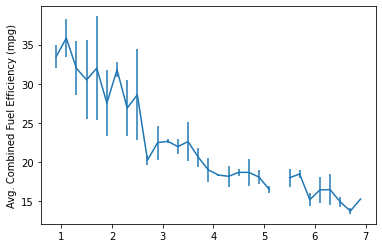

In [99]:
# Plot the summarized data
plt.errorbar(x=bin_centers,y=comb_mean,yerr=comb_std)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

## Alternate Variations
Instead of computing summary statistics on fixed bins, we can also make computations on a rolling window through use of pandas' `rolling` method. Since the rolling window will make computations on sequential rows of the dataframe, we should use `sort_values` to put the x-values in `ascending` order first.

#### compute statistics in a rolling window
`df_window = df.sort_values('num_var1').rolling(15)
x_winmean = df_window.mean()['num_var1']
y_median = df_window.median()['num_var2']
y_q1 = df_window.quantile(.25)['num_var2']
y_q3 = df_window.quantile(.75)['num_var2']`

#### plot the summarized data
`base_color = sb.color_palette()[0]
line_color = sb.color_palette('dark')[0]
plt.scatter(data = df, x = 'num_var1', y = 'num_var2')`

`plt.errorbar(x = x_winmean, y = y_median, c = line_color)
plt.errorbar(x = x_winmean, y = y_q1, c = line_color, linestyle = '--')
plt.errorbar(x = x_winmean, y = y_q3, c = line_color, linestyle = '--')`

`plt.xlabel('num_var1')
plt.ylabel('num_var2')`

Note that we're also not limited to just one line when plotting. When multiple Matplotlib functions are called one after the other, all of them will be plotted on the same axes. Instead of plotting the mean and error bars, **we will plot the three central quartiles, laid on top of the scatterplot**.

# Another bivariate application of line plots 
is to plot the distribution of a numeric variable for different levels of a categorical variable. This is another alternative to using `violin plots`, `box plots`, and `faceted histograms`. 

With the `line plot`, one line is plotted for each category level, like overlapping the histograms on top of one another.

This can be accomplished through **multiple errorbar calls** using the methods above, or by performing **multiple hist calls**, setting the `histtype = step` parameter so that the bars are depicted as unfilled lines.

`bin_edges = np.arange(-3, df['num_var'].max()+1/3, 1/3)
g = sb.FacetGrid(data = df, hue = 'cat_var', size = 5)
g.map(plt.hist, "num_var", bins = bin_edges, histtype = 'step')
g.add_legend()`

Note that I'm performing the multiple hist calls through the use of `FacetGrid`, setting the categorical variable on the `hue` parameter rather than the `col` parameter.

## Functions do not need to be built-ins
That you provide to the map method of FacetGrid objects

the below function perform the summarization operations seen above to plot an errorbar line for each level of the categorical variable, then fed that function `freq_poly` to `map`.

In [104]:
def freq_poly(x, bins = 10, **kwargs):
    """ Custom frequency polygon / line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    counts = x.groupby(data_bins).count()

    # create plot
    plt.errorbar(x = bin_centers, y = counts, **kwargs)

`bin_edges = np.arange(-3, df['num_var'].max()+1/3, 1/3)
g = sb.FacetGrid(data = df, hue = 'cat_var', size = 5)
g.map(freq_poly, "num_var", bins = bin_edges)
g.add_legend()`

adding `add_legend` method call is useful to identify which level is associated with each curve. `**kwargs` is used to allow additional keyword arguments to be set for the `errorbar` function.

### Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with (at least eighty) cars in the dataset

New DataFrame:

In [109]:
freq = fuel_econ['make'].value_counts()
c = np.sum(freq>80)
freq = freq.index[:c]
freq = fuel_econ.loc[fuel_econ['make'].isin(freq)]

New Oreder :

In [106]:
make_means = freq.groupby('make').mean()
comb_order = make_means.sort_values('comb', ascending = False).index

Plot:

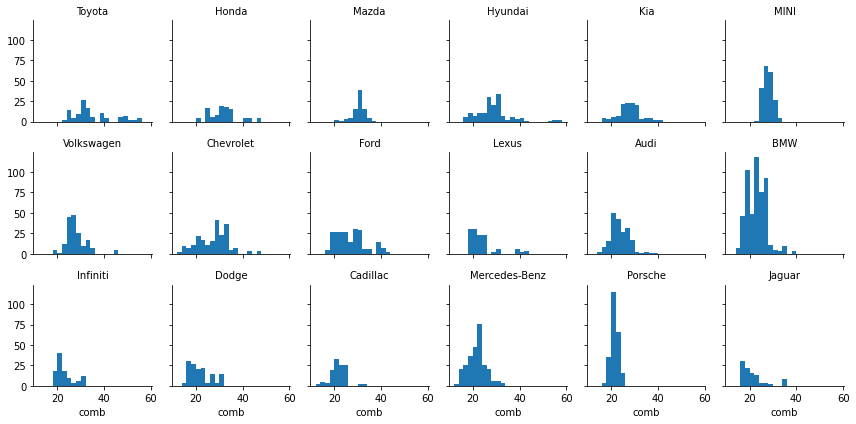

In [108]:
g = sb.FacetGrid(data = freq, col = 'make', col_order = comb_order,col_wrap=6,size=2)
g.map(plt.hist, "comb", bins = np.arange(12, freq['comb'].max()+2, 2))
g.set_titles('{col_name}');

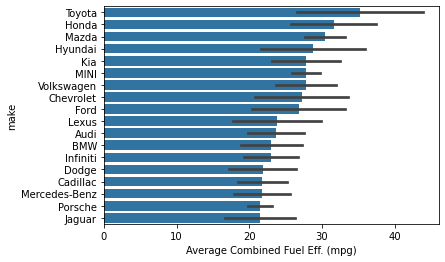

In [114]:
sb.barplot(data=freq,x='comb',y='make',color=base_color, order = comb_order, ci = 'sd')
plt.xlabel('Average Combined Fuel Eff. (mpg)');

# Useful References
- https://seaborn.pydata.org/examples/index.html
- https://matplotlib.org/3.3.1/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py
- https://github.com/udacity/AIPND